# 3. Measuring Photometric Redshifts using EAZY for Cropped Region 1

In this step, we will measure photometric redshifts using EAZY software ([Brammer, van Dokkum & Coppi (2008)](https://ui.adsabs.harvard.edu/abs/2008ApJ...686.1503B/abstract)). The software is available for download from https://github.com/gbrammer/eazy-photoz. As the name suggests, this software is quite easy to use.

In [1]:
import os, sys
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

You can call EAZY from any directory. What you will need is just copy `templates` folder, FILTER.RES.latest, and FILTER.RES.latest.info files from the EAZY directory into your working directory, prepare a configuration file, and make a new directory called `OUTPUT`. Please refer to EAZY documentation (http://www.astro.yale.edu/eazy/?doc) for thorough explanations on it. Commonly, you will only need to change the following parts: `Filters`, `Input Files`, and `Output Files`. 

We have made two configuration files (zphot.param1 and zphot.param2) for this tutorial. zphot.param1 is intended for photo-z measurement of cropped region 1, while the zphot.param2 is for cropped region 2.

## 3.1. Run EAZY

EAZY is run via terminal commands. By using the `os` package in python, we can also execute terminal command in a python script. In this tutorial, we will be using this scheme.

In [2]:
dir_eazy = '/data/users/abdurrouf/softwares/eazy-photoz/src'  # change this depending on your EAZY directory 

#### run the photo-z calculation
os.system('%s/eazy -p zphot.param1' % dir_eazy)

0

EAZY run very fast. This calculation only takes ~20 seconds.

## 3.2. Check Fitting Results

We can check the results of spectral energy distribution (SED) fitting with EAZY using `threedhst` package, which can be downloaded from https://github.com/gbrammer/threedhst. To be able to call `threedhst` within this jupyter notebook, we need to define the path to it using `sys.path.append`.   

In [3]:
sys.path.append('/data/users/abdurrouf/softwares/threedhst') # change this depending on your threedhst directory

import threedhst.eazyPy as eazy

## Plotting best-fit model SEDs and the redshift likelihoods

Try ascii:
OUTPUT/photz1.zout
11570.545530 1.379074e-03 1.269875e-03 7.879040e-04
15039.937671 1.178045e-03 1.480950e-03 6.523911e-04
19933.935699 7.502377e-04 6.377560e-04 3.225922e-04
27699.654015 4.027910e-04 4.191585e-04 1.865235e-04
35766.602929 2.758811e-04 2.804274e-04 1.180882e-04
44153.971091 1.856875e-04 1.836100e-04 7.755470e-05
Try ascii:
OUTPUT/photz1.zout
11570.545530 2.216201e-03 2.329567e-03 1.061956e-03
15039.937671 1.529591e-03 1.707684e-03 7.002768e-04
19933.935699 8.932743e-04 1.009528e-03 4.044794e-04
27699.654015 4.164113e-04 4.185098e-04 1.863829e-04
35766.602929 2.461494e-04 2.381926e-04 1.088524e-04
44153.971091 1.519953e-04 1.191384e-04 6.253687e-05
Try ascii:
OUTPUT/photz1.zout
11570.545530 2.467845e-03 2.222473e-03 1.036459e-03
15039.937671 1.871424e-03 1.920480e-03 7.411193e-04
19933.935699 1.119038e-03 1.262054e-03 4.516003e-04
27699.654015 5.343995e-04 5.727989e-04 2.180063e-04
35766.602929 3.270648e-04 3.383231e-04 1.296977e-04
44153.971091 2.025248e-04 

11570.545530 2.390437e-03 2.595485e-03 1.118017e-03
15039.937671 2.366190e-03 2.006358e-03 7.570670e-04
19933.935699 1.988940e-03 2.250250e-03 6.016173e-04
27699.654015 1.500531e-03 1.493599e-03 3.517982e-04
35766.602929 1.090179e-03 1.092758e-03 2.329967e-04
44153.971091 8.237187e-04 8.137380e-04 1.629424e-04
Try ascii:
OUTPUT/photz1.zout
11570.545530 0.000000e+00 -9.900000e+01 -9.900000e+01
15039.937671 0.000000e+00 -9.900000e+01 -9.900000e+01
19933.935699 0.000000e+00 -9.900000e+01 -9.900000e+01
27699.654015 0.000000e+00 -9.900000e+01 -9.900000e+01
35766.602929 0.000000e+00 -9.900000e+01 -9.900000e+01
44153.971091 0.000000e+00 8.595932e-02 1.674223e-03
Try ascii:
OUTPUT/photz1.zout
11570.545530 4.873646e-04 8.229785e-04 6.396518e-04
15039.937671 3.905898e-04 6.356648e-04 4.335468e-04
19933.935699 2.272752e-04 3.463126e-04 2.397300e-04
27699.654015 1.099661e-04 1.364594e-04 1.066816e-04
35766.602929 6.764691e-05 1.028772e-04 7.160134e-05
44153.971091 4.258814e-05 1.576253e-05 2.33310

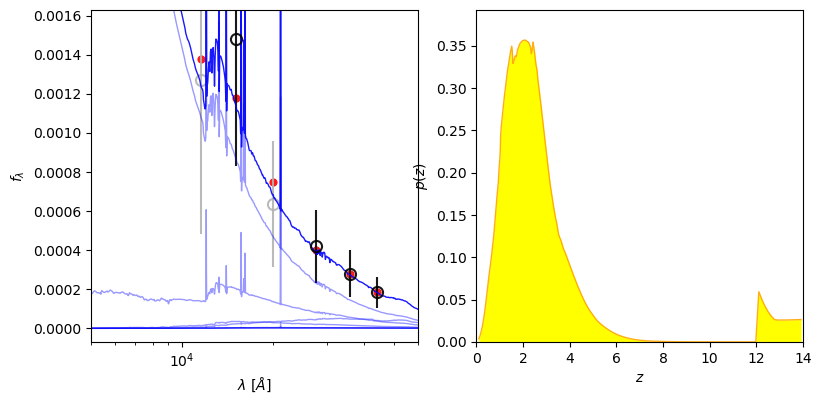

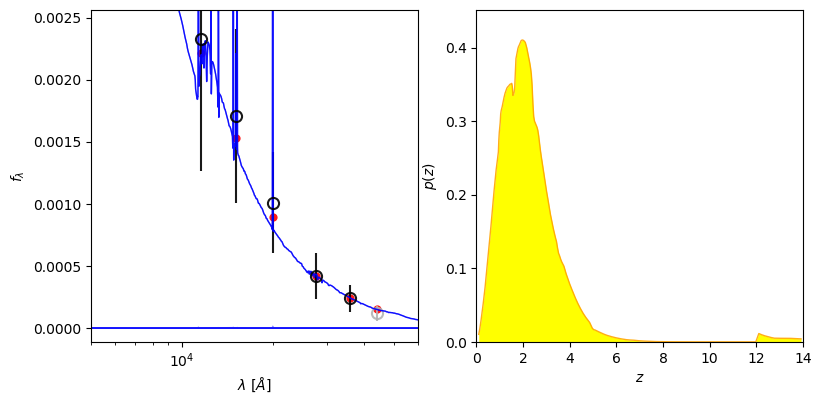

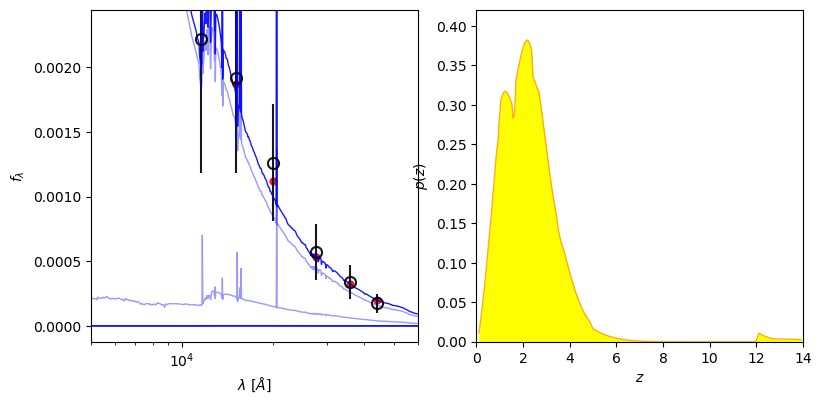

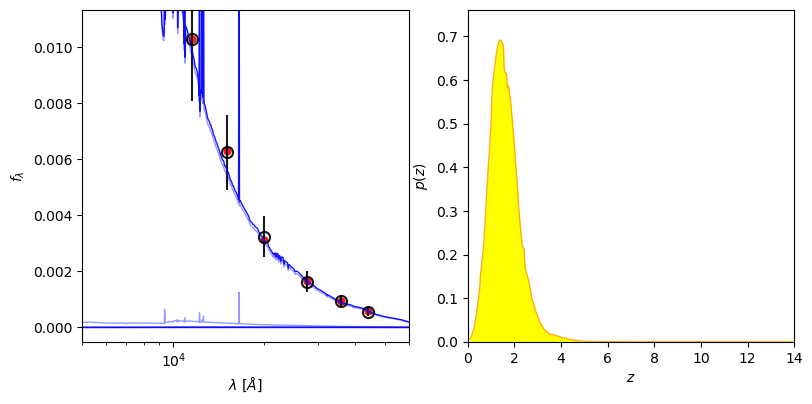

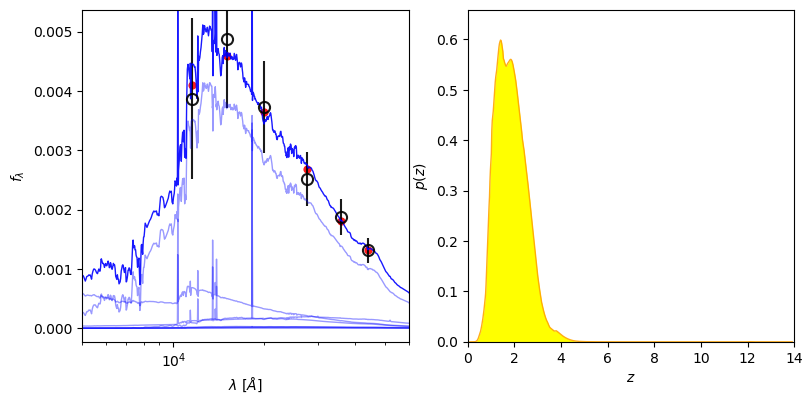

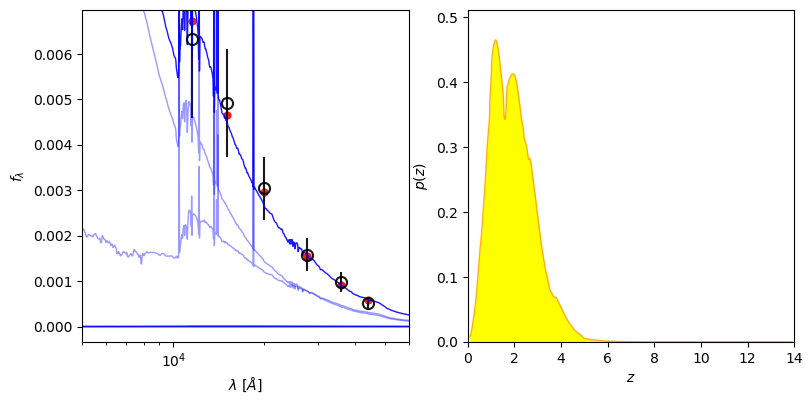

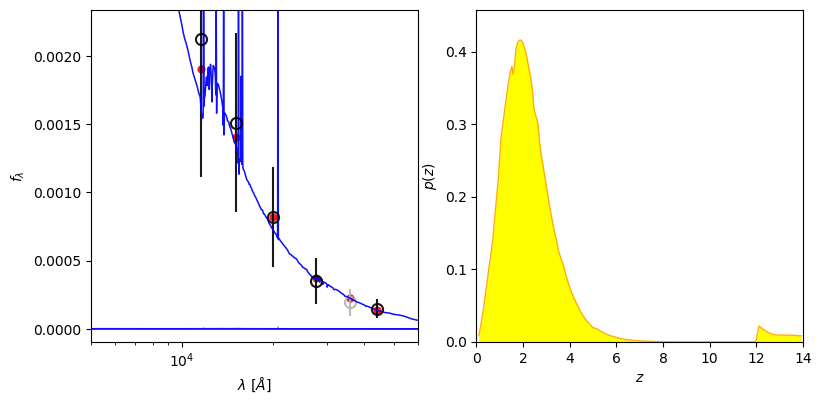

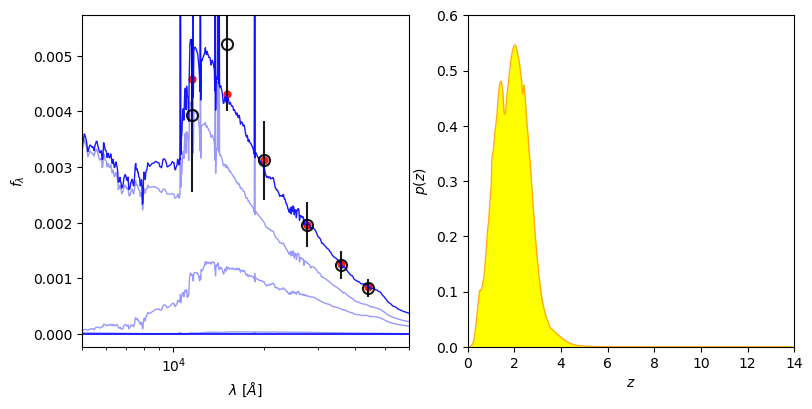

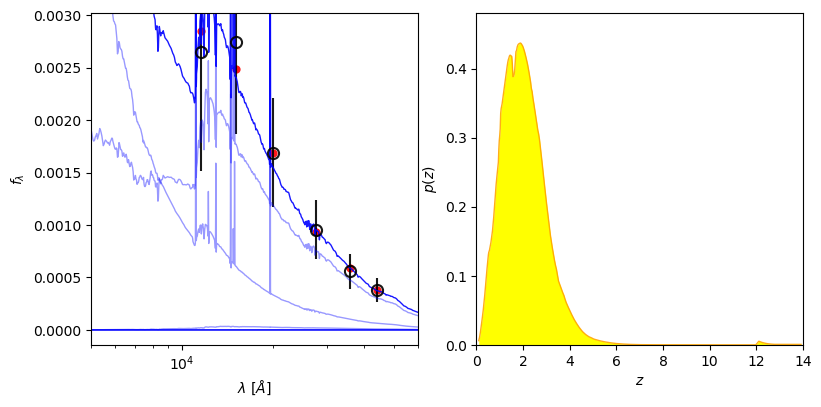

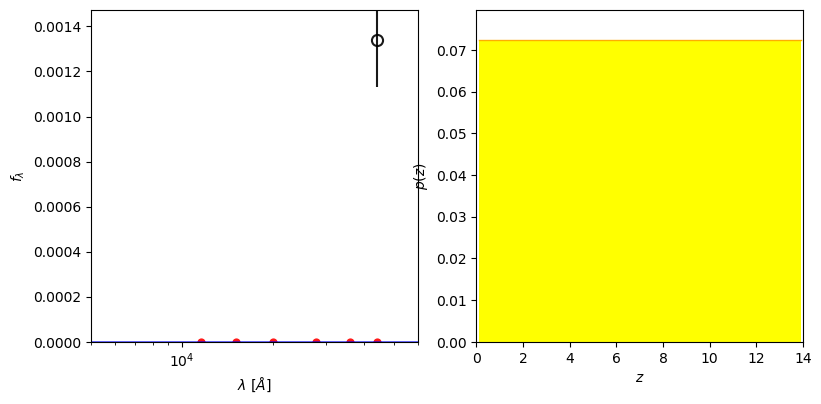

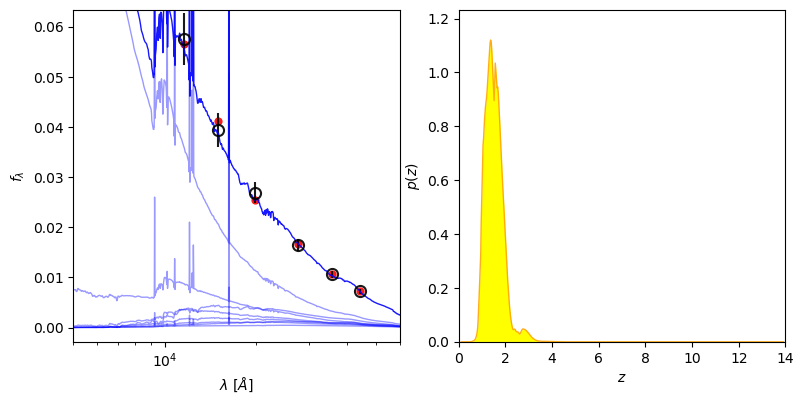

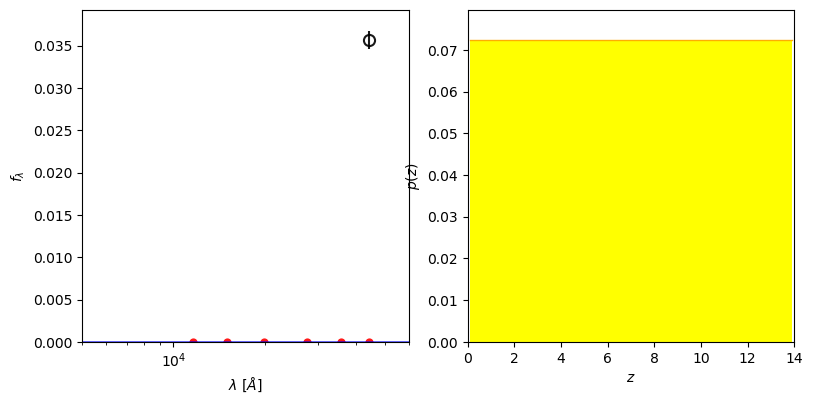

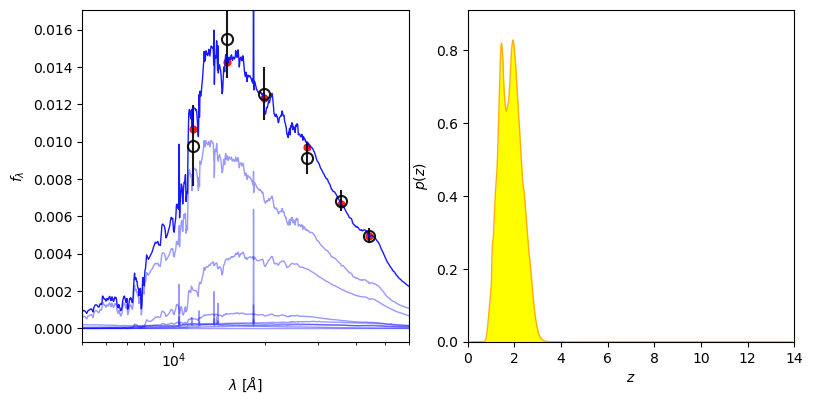

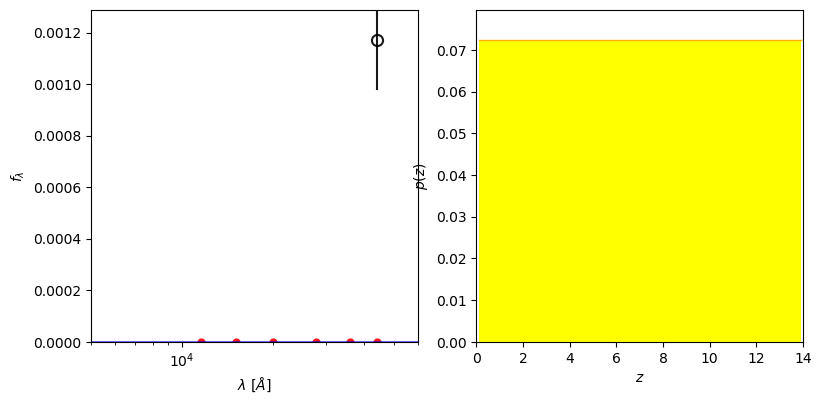

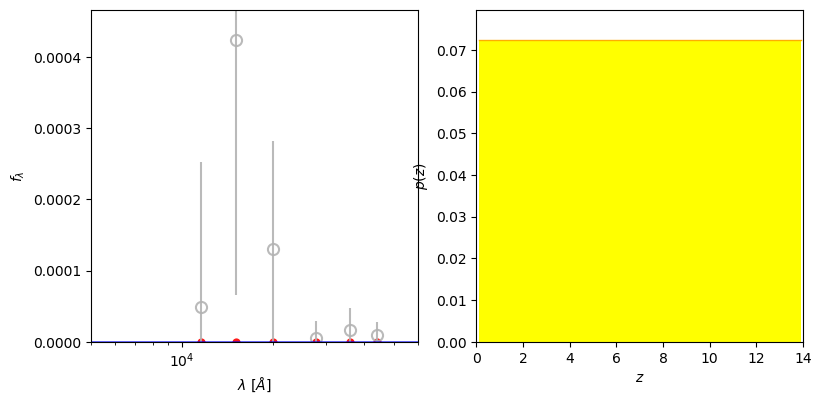

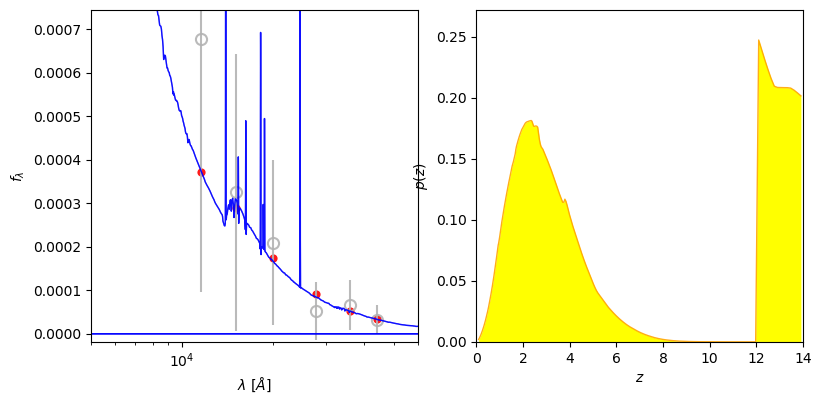

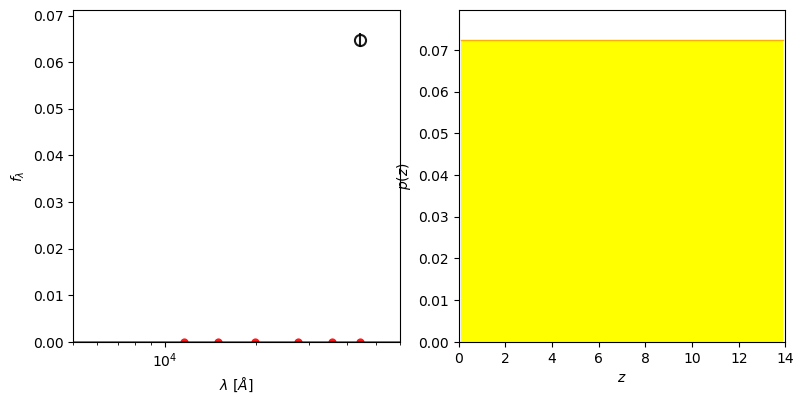

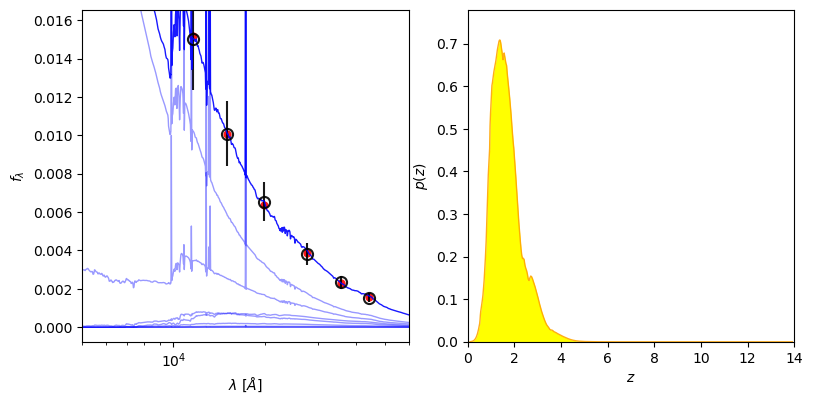

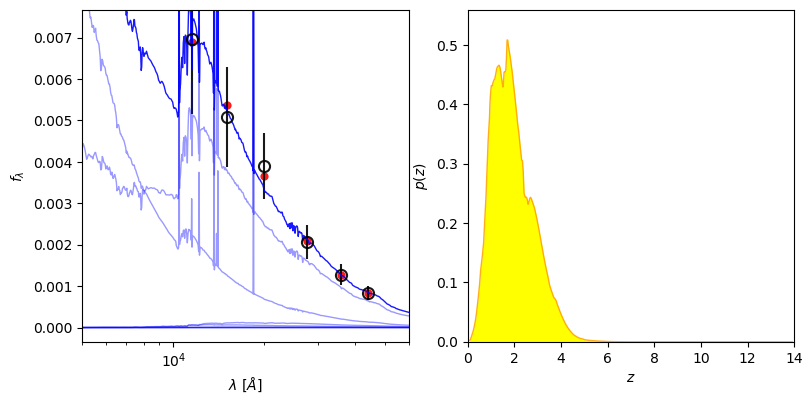

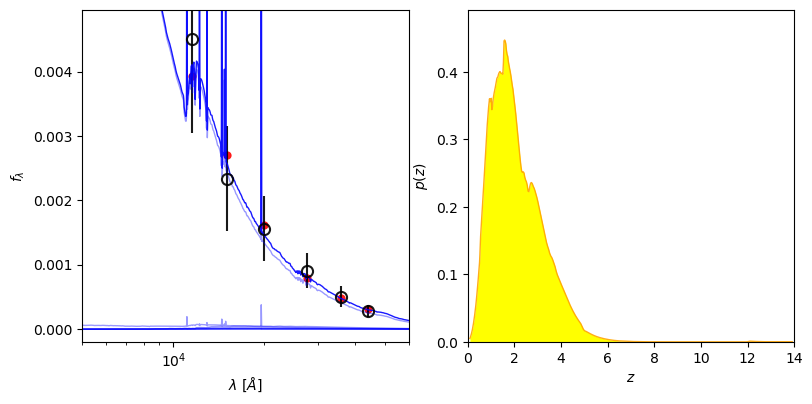

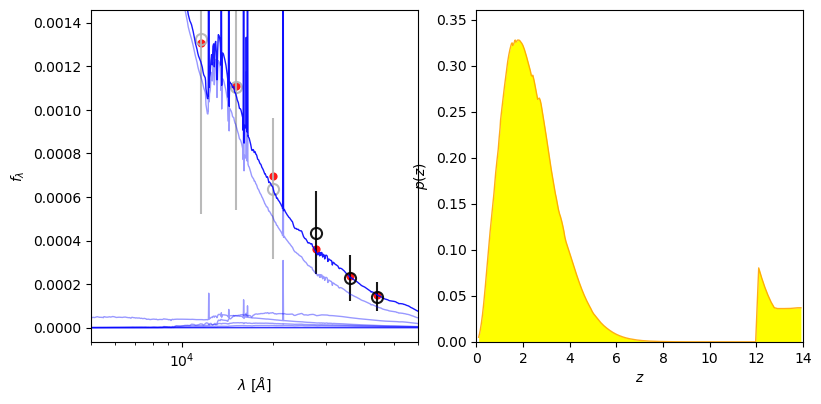

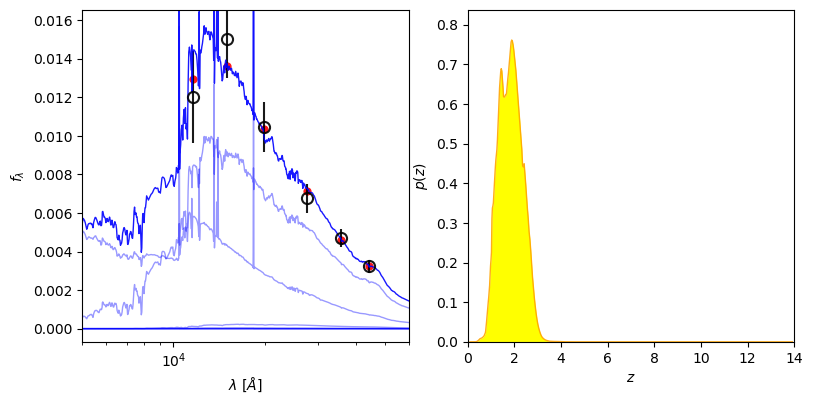

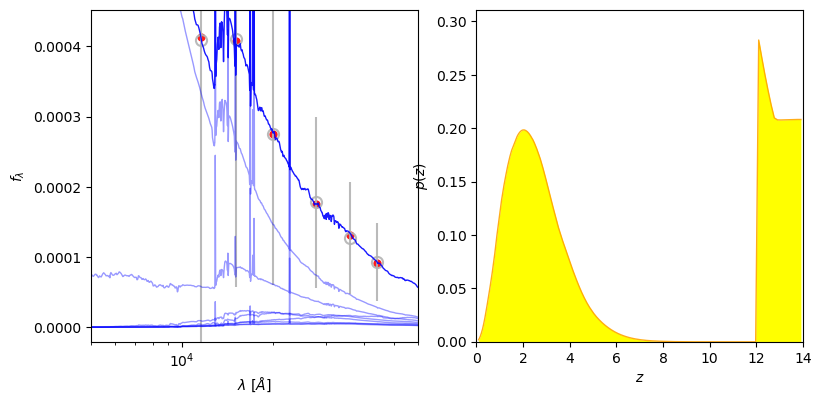

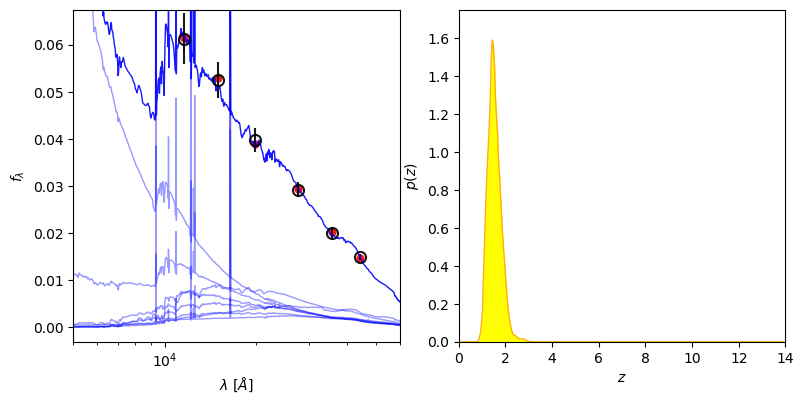

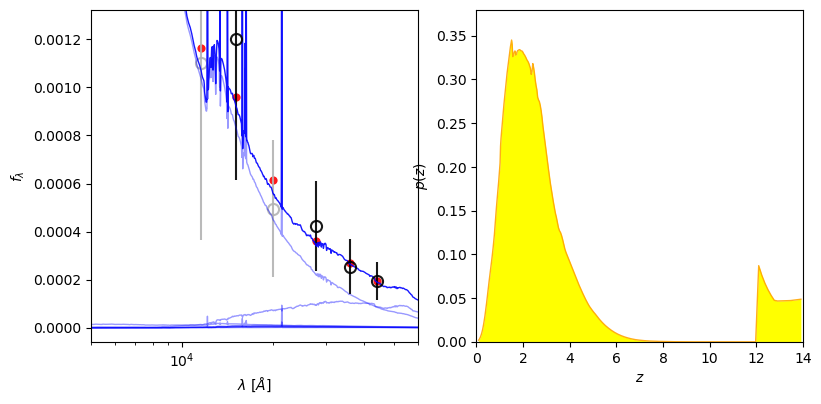

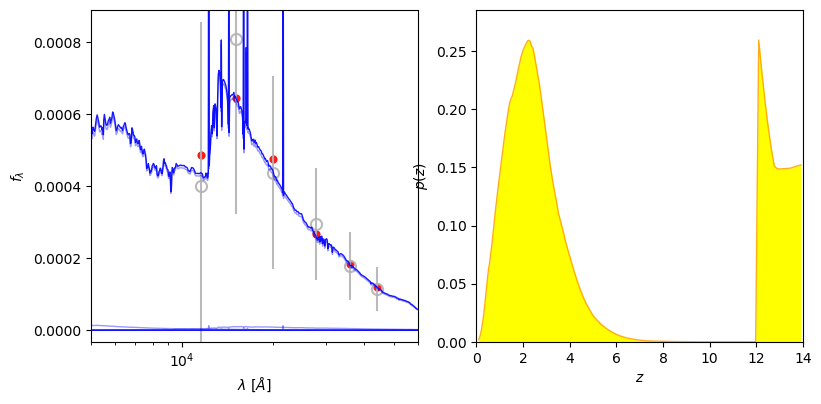

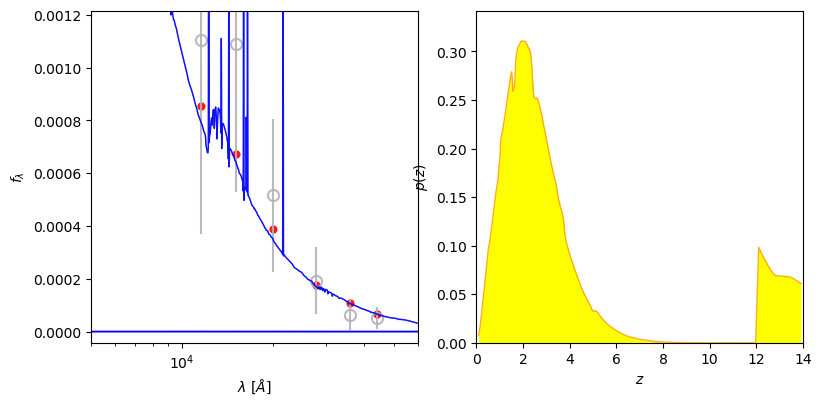

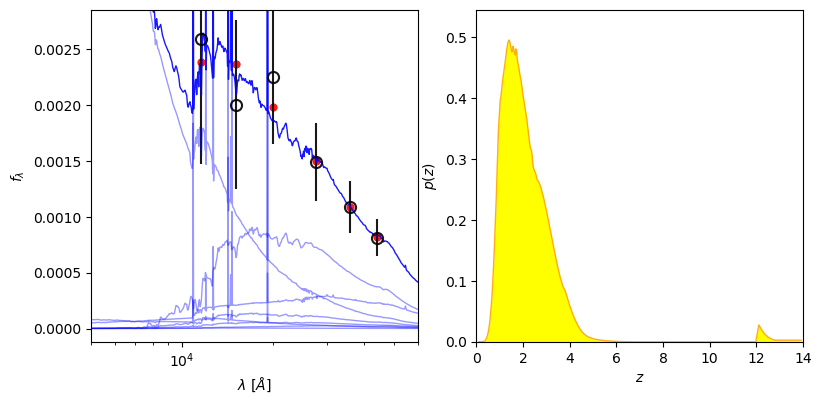

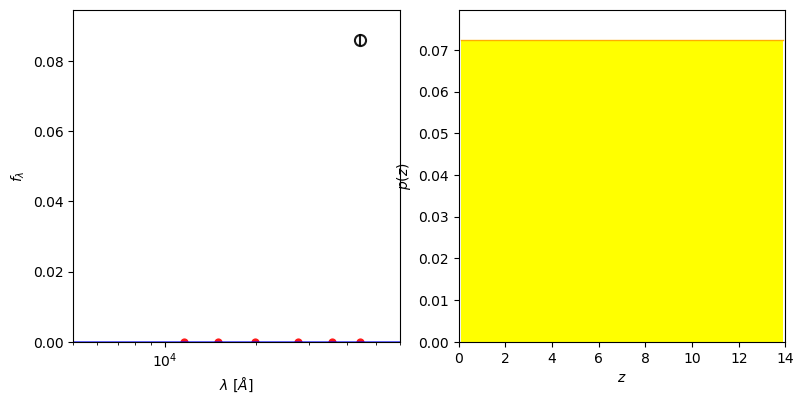

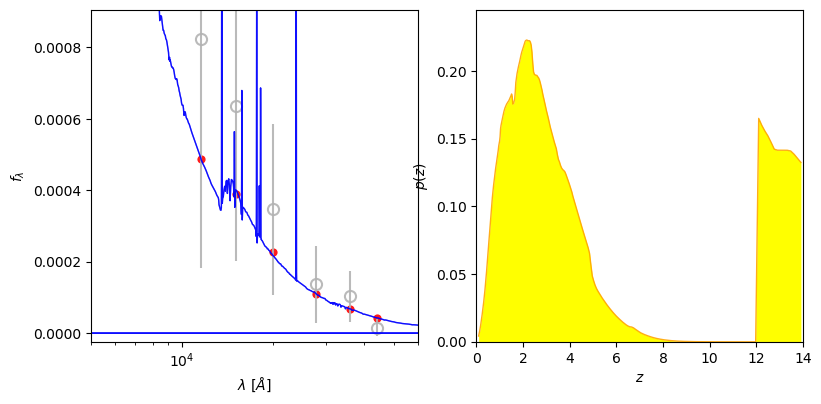

In [6]:
%matplotlib inline

# get number of objects
data = np.loadtxt('ceers_eazy_input_crop1.cat')
nobj = len(data[:,0])

idx = np.random.randint(1,nobj,30)

for ii in idx:
    axes = eazy.plotExampleSED(idx=ii, writePNG=False, MAIN_OUTPUT_FILE='photz1',
                           OUTPUT_DIRECTORY='OUTPUT', CACHE_FILE='Same', lrange=[5000, 6.e4],
                           axes=None, individual_templates=True, fnu=False)

## 3.3. Get measured photometric redshifts

The resulting photometric redshifts are stored in a text file (`photz1.zout`) inside the `OUTPUT` folder. In this output text file, the best-fit redshift is given in 8th column (`z_m2`, i.e., median likelihood redshift). Another important parameter is chi-square (`chi_p` in the output text file) which tells how well the fitting is.

We will retrieve these measured redshifts and merge them with the photometric data that we have made previously into a new catalog.  

In [7]:
data = np.loadtxt('OUTPUT/photz1.zout')

# we will store the redshifts into this array variable
photo_z = data[:,7]

# get the chi-square
chi2 = data[:,6]

Let's make a histogram of redshifts

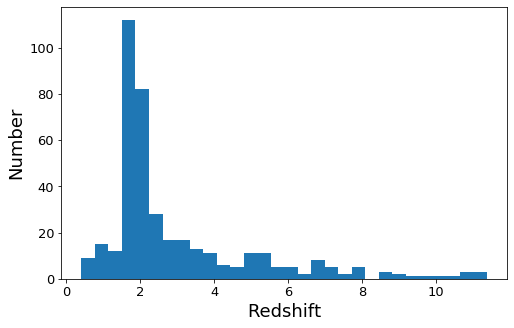

In [8]:
fig1 = plt.figure(figsize=(8,5))
f1 = plt.subplot()
plt.xlabel("Redshift", fontsize=18)
plt.ylabel("Number", fontsize=18)
plt.setp(f1.get_yticklabels(), fontsize=13)
plt.setp(f1.get_xticklabels(), fontsize=13)

plt.hist(photo_z[photo_z>0.0], 30)
plt.show()

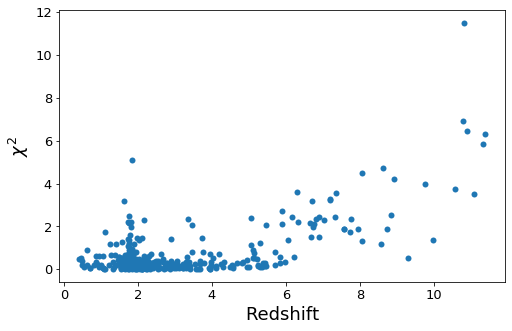

In [9]:
# Plot between photo-z vs. chi-square

fig1 = plt.figure(figsize=(8,5))
f1 = plt.subplot()
plt.xlabel("Redshift", fontsize=18)
plt.ylabel(r"$\chi^{2}$", fontsize=18)
plt.setp(f1.get_yticklabels(), fontsize=13)
plt.setp(f1.get_xticklabels(), fontsize=13)

plt.scatter(photo_z[photo_z>0], chi2[photo_z>0])

## 3.4. Merge with the photometric catalog

In [10]:
# get the photometric catalog
data = np.loadtxt('../ceers_crop1_photo.cat')

# Add two columns for photo-z and chi-square
file_out = open("ceers_crop1_photo_pz.cat","w")
file_out.write("#(1)id (2)x (3)y (4)ra (5)dec (6)f_f115w (7)e_f115w (8)f_f150w (9)e_f150w (10)f_f200w (11)e_f200w (12)f_f277w (13)e_f277w (14)f_f356w (15)e_f356w (16)f_f444w (17)e_f444w (18)photo-z (20)photo-z chi2\n")
file_out.write("# All flux densisties are in units of erg/s/cm^2/Angstrom \n")
for yy in range(0,data.shape[0]):
    file_out.write("%d  " % data[yy][0])
    for xx in range(1,data.shape[1]):
        file_out.write("%e  " % data[yy][xx])
    file_out.write("%lf  %lf\n" % (photo_z[yy],chi2[yy]))
file_out.close()